## Kode dari chatgpt buat nyari opt x (KURENG, PAKE BAWAHNYA AJA)

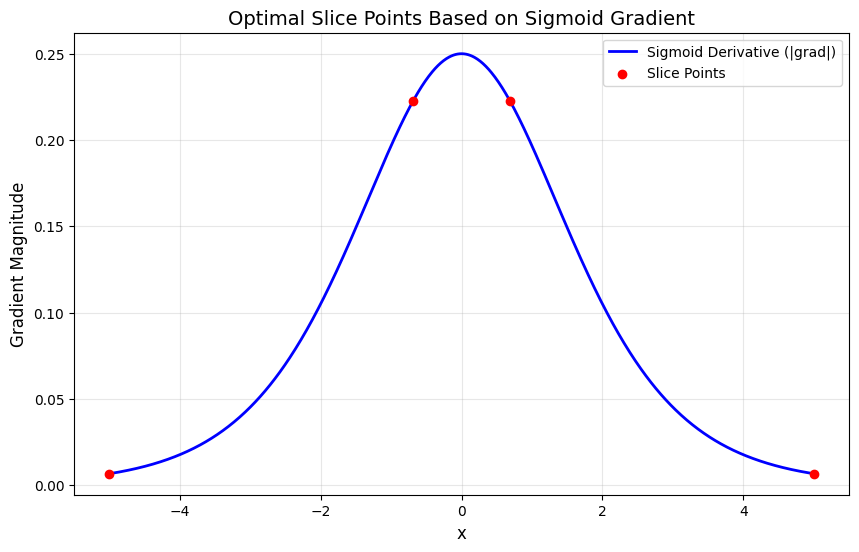

array([-5.        , -0.68568569,  0.68568569,  5.        ])

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi sigmoid dan turunan sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Domain sigmoid
x_domain = np.linspace(-5, 5, 1000)

# Gradien sigmoid
grad = np.abs(sigmoid_derivative(x_domain))

# Fungsi untuk memilih titik slice berdasarkan gradien
def select_slices(x_domain, grad, num_slices):
    """
    Memilih titik slice berdasarkan perubahan gradien.
    """
    # Normalisasi gradien
    grad_cumsum = np.cumsum(grad)  # Integral numerik dari gradien
    grad_cumsum /= grad_cumsum[-1]  # Normalisasi ke [0, 1]
    
    # Pilih titik slice pada interval yang merata di [0, 1]
    thresholds = np.linspace(0, 1, num_slices + 1)
    slices = []
    
    for t in thresholds:
        idx = np.searchsorted(grad_cumsum, t)
        slices.append(x_domain[idx])
    
    return np.array(slices)

# Pilih 4 titik slice
num_slices = 4
optimal_slices = select_slices(x_domain, grad, num_slices-1)

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(x_domain, grad, label="Sigmoid Derivative (|grad|)", color="blue", linewidth=2)
plt.scatter(optimal_slices, sigmoid_derivative(optimal_slices), color="red", zorder=5, label="Slice Points")
plt.title("Optimal Slice Points Based on Sigmoid Gradient", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("Gradient Magnitude", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.show()

# Output titik slice optimal
optimal_slices

## Algoritma dari blackbox AI (GACOR ALL IN)
### Optimized point for sigmoid

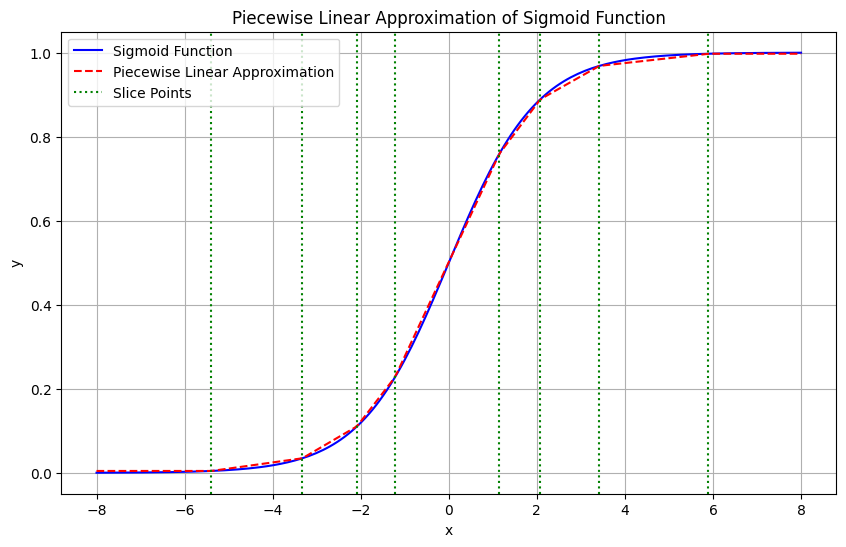

Optimal slice points: [-5.38877024 -3.32532059 -2.08119971 -1.21932566  1.14919065  2.08101323
  3.42018134  5.8904377 ]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the piecewise linear function
def piecewise_linear(x, slice_points):
    # Sort slice points
    slice_points = np.sort(slice_points)
    # Create piecewise linear segments
    segments = []
    for i in range(len(slice_points) - 1):
        x1, x2 = slice_points[i], slice_points[i + 1]
        y1, y2 = sigmoid(x1), sigmoid(x2)
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        segments.append((slope, intercept, x1, x2))
    
    # Evaluate the piecewise linear function
    y = np.zeros_like(x)
    for slope, intercept, x1, x2 in segments:
        mask = (x >= x1) & (x < x2)
        y[mask] = slope * x[mask] + intercept
    
    # Handle the endpoints
    if slice_points[0] > x[0]:
        y[x < slice_points[0]] = sigmoid(slice_points[0])
    if slice_points[-1] < x[-1]:
        y[x >= slice_points[-1]] = sigmoid(slice_points[-1])
    
    return y

# Define the error function to minimize
def error_function(slice_points, x, y):
    y_approx = piecewise_linear(x, slice_points)
    return np.mean((y - y_approx) ** 2)

# Main function to find optimal slice points
def find_optimal_slices(num_slices, x_range):
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], 100)
    y = sigmoid(x)

    # Initial guess for slice points
    initial_slices = np.linspace(x_range[0], x_range[1], num_slices)

    # Optimize slice points
    result = minimize(error_function, initial_slices, args=(x, y), method='Nelder-Mead')
    
    return np.sort(result.x)

# Parameters
num_slices = 8
x_range = (-8, 8)

# Find optimal slice points
optimal_slices = find_optimal_slices(num_slices, x_range)

# Generate x values and sigmoid function for plotting
x_values = np.linspace(x_range[0], x_range[1], 200)
sigmoid_values = sigmoid(x_values)
piecewise_values = piecewise_linear(x_values, optimal_slices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, sigmoid_values, label='Sigmoid Function', color='blue')
plt.plot(x_values, piecewise_values, label='Piecewise Linear Approximation', color='red', linestyle='--')
plt.axvline(x=optimal_slices[0], color='green', linestyle=':', label='Slice Points')
plt.axvline(x=optimal_slices[-1], color='green', linestyle=':')
for point in optimal_slices[1:-1]:
    plt.axvline(x=point, color='green', linestyle=':')
plt.title('Piecewise Linear Approximation of Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print("Optimal slice points:", optimal_slices)

## 4 Slices Sigmoid

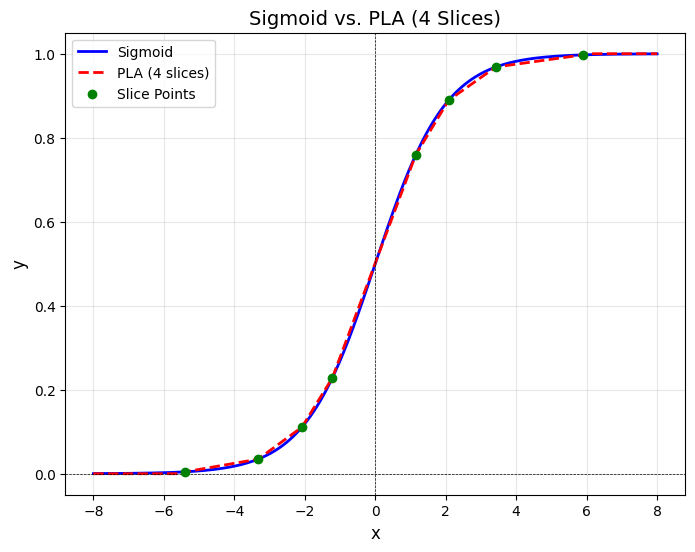

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Titik slice
x_slices = [-5.38877024, -3.32532059, -2.08119971, -1.21932566,  1.14919065,  2.08101323, 3.42018134,  5.8904377 ]

# Hitung gradien dan intersep untuk setiap slice
m_values = []
b_values = []

for i in range(len(x_slices) - 1):
    x1, x2 = x_slices[i], x_slices[i + 1]
    y1, y2 = sigmoid(x1), sigmoid(x2)
    m = (y2 - y1) / (x2 - x1)  # Gradien
    b = y1 - m * x1           # Intersep
    m_values.append(m)
    b_values.append(b)

# Fungsi PLA berdasarkan slice
def pla_sigmoid(x):
    for i in range(len(x_slices) - 1):
        if x_slices[i] <= x <= x_slices[i + 1]:
            return m_values[i] * x + b_values[i]
    return 0 if x < x_slices[0] else 1

# Generate data untuk plot
x = np.linspace(-8, 8, 500)
y_sigmoid = sigmoid(x)
y_pla = np.array([pla_sigmoid(xi) for xi in x])

# Plot fungsi sigmoid asli dan PLA
plt.figure(figsize=(8, 6))
plt.plot(x, y_sigmoid, label="Sigmoid", color="blue", linewidth=2)
plt.plot(x, y_pla, label="PLA (4 slices)", color="red", linestyle="--", linewidth=2)
plt.scatter(x_slices, sigmoid(np.array(x_slices)), color="green", zorder=5, label="Slice Points")

# Tambahkan detail plot
plt.title("Sigmoid vs. PLA (4 Slices)", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

## Algo dari blackbox AI lagi untuk softplus

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the softplus function
def softplus(x):
    return np.log1p(np.exp(x))  # More stable implementation

# Define the piecewise linear function
def piecewise_linear(x, slice_points):
    # Sort slice points
    slice_points = np.sort(slice_points)
    # Create piecewise linear segments
    segments = []
    for i in range(len(slice_points) - 1):
        x1, x2 = slice_points[i], slice_points[i + 1]
        y1, y2 = softplus(x1), softplus(x2)
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        segments.append((slope, intercept, x1, x2))
    
    # Evaluate the piecewise linear function
    y = np.zeros_like(x)
    for slope, intercept, x1, x2 in segments:
        mask = (x >= x1) & (x < x2)
        y[mask] = slope * x[mask] + intercept
    
    # Handle the endpoints
    if slice_points[0] > x[0]:
        y[x < slice_points[0]] = softplus(slice_points[0])
    if slice_points[-1] < x[-1]:
        y[x >= slice_points[-1]] = softplus(slice_points[-1])
    
    return y

# Define the error function to minimize
def error_function(slice_points, x, y):
    y_approx = piecewise_linear(x, slice_points)
    return np.mean((y - y_approx) ** 2)

# Main function to find optimal slice points
def find_optimal_slices(num_slices, x_range):
    # Generate x values
    x = np.linspace(x_range[0], x_range[1], 100)
    y = softplus(x)

    # Initial guess for slice points
    initial_slices = np.linspace(x_range[0], x_range[1], num_slices)

    # Optimize slice points
    result = minimize(error_function, initial_slices, args=(x, y), method='Nelder-Mead')
    
    return np.sort(result.x)

# Parameters
num_slices = 4
x_range = (-3, 3)

# Find optimal slice points
optimal_slices = find_optimal_slices(num_slices, x_range)

# Generate x values and softplus function for plotting
x_values = np.linspace(x_range[0], x_range[1], 200)
softplus_values = softplus(x_values)
piecewise_values = piecewise_linear(x_values, optimal_slices)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, softplus_values, label='Softplus Function', color='blue')
plt.plot(x_values, piecewise_values, label='Piecewise Linear Approximation', color='red', linestyle='--')
plt.axvline(x=optimal_slices[0], color='green', linestyle=':', label='Slice Points')
plt.axvline(x=optimal_slices[-1], color='green', linestyle=':')
for point in optimal_slices[1:-1]:
    plt.axvline(x=point, color='green', linestyle=':')
plt.title('Piecewise Linear Approximation of Softplus Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

print("Optimal slice points:", optimal_slices)